In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from scipy import optimize
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

## Problem 1

In [2]:
def newton_method(f_l, df_dx_l, x_0, stop_tol = 1e-5, max_iter = 15):
    x_new = x_0
    for i in range(max_iter):
        x_new = x_new - f_l(x_new)/df_dx_l(x_new)
        if x_new < stop_tol:
            break
    
    return x_new

In [20]:
f_l = lambda x: anp.exp(x)-2
df_dx_l = grad(f_l)


# Get the customized and scipy newton method results
print('x_0 Custom x value,  Scipy x value,    Difference between both')
for i in range (10):
    x_new_custom = newton_method(f_l, df_dx_l, i)
    x_new_scipy = optimize.newton(f_l, i, df_dx_l)
    print(i, x_new_custom, x_new_scipy, x_new_custom-x_new_scipy)

x_0 Custom x value,  Scipy x value,    Difference between both
0.0 0.6931471805599453 0.6931471805599453 0.0
1.0 0.6931471805599453 0.6931471805599453 0.0
2.0 0.6931471805599453 0.6931471805599453 0.0
3.0 0.6931471805599454 0.6931471805599454 0.0
4.0 0.6931471805599454 0.6931471805599454 0.0
5.0 0.6931471805599454 0.6931471805599454 0.0
6.0 0.6931471805599454 0.6931471805599454 0.0
7.0 0.6931471805599454 0.6931471805599454 0.0
8.0 0.6931471805599453 0.6931471805599453 0.0
9.0 0.6931471805599453 0.6931471805599453 0.0


In [24]:
f_l = lambda x: anp.power(x,4)-3
df_dx_l = grad(f_l)

print('x_0 Custom x value,  Scipy x value,    Difference between both')
for i in range (1,10):
    i = float(i)
    x_new_custom = newton_method(f_l, df_dx_l, i)
    x_new_scipy = optimize.newton(f_l, i, df_dx_l)
    print(i, x_new_custom, x_new_scipy, x_new_custom-x_new_scipy)

x_0 Custom x value,  Scipy x value,    Difference between both
1.0 1.3160740129524924 1.3160740129524924 0.0
2.0 1.3160740129524924 1.3160740129524924 0.0
3.0 1.3160740129524924 1.3160740129524924 0.0
4.0 1.3160740129524924 1.3160740129524924 0.0
5.0 1.3160740129524924 1.3160740129524924 0.0
6.0 1.3160740129524924 1.3160740129524924 0.0
7.0 1.3160740129524924 1.3160740129524924 0.0
8.0 1.3160740129524924 1.3160740129524924 0.0
9.0 1.3160740129524924 1.3160740129524924 0.0


## Problem 3

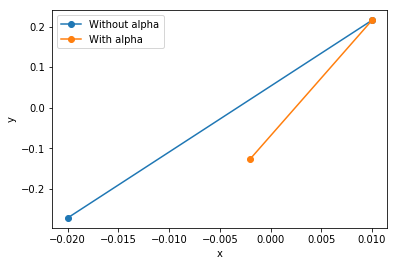

In [25]:
def newton_method_new(f_l, df_dx_l, x_0, stop_tol = 1e-5, max_iter = 15, alpha=1):
    x_new = x_0
    x_list = [x_0]
    for i in range(max_iter):
        x_new = x_new - alpha*f_l(x_new)/df_dx_l(x_new)
        x_list.append(x_new)
        if x_new < stop_tol:
            break
        
    return x_new, x_list


# Lambdify f and df_dx
f_l = lambda x: np.sign(x) * np.power(np.abs(x),1/3)
df_dx_l = elementwise_grad(f_l)

x_custom, x_custom_list = newton_method_new(f_l, df_dx_l, .01, stop_tol = 1e-8)
x_new_custom, x_new_custom_list = newton_method_new(f_l, df_dx_l, .01, stop_tol = 1e-8, alpha=0.4)


plt.plot(x_custom_list, f_l(x_custom_list), '-o', label = 'Without alpha')
plt.plot(x_new_custom_list, f_l(x_new_custom_list), '-o', label='With alpha')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Problem 4

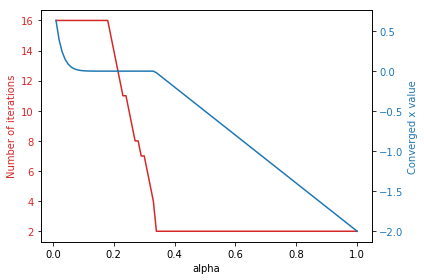

In [34]:
alpha_grid = np.linspace(1,0,100, endpoint=False)
num_it = []
x_list = []
for i in range(alpha_grid.shape[0]):
    x_opt, x_custom_list = newton_method_new(f_l, df_dx_l, 1., alpha=alpha_grid[i])
    num_it.append(len(x_custom_list))
    x_list.append(x_opt)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('alpha')
ax1.set_ylabel('Number of iterations', color=color)
ax1.plot(alpha_grid, num_it, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Converged x value', color=color)  # we already handled the x-label with ax1
ax2.plot(alpha_grid, x_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

## Problem 7

Problem 7. 

Write a function that accepts a function f : C → C, its derivative f′: C → C, an array zeros of the zeros of f, bounds [rmin,rmax,imin,imax] for the domain of the plot, an integer res that determines the resolution of the plot, and number of iterations iters to run the iteration. Compute and plot the basins of attraction of f in the complex plane over the specified domain in the following steps.

1. Construct a res×res grid X0 over the domain {a + bi | a ∈ [rmin, rmax], b ∈ [imin, imax]}.

2. Run Newton’s method (without backtracking) on X0 iters times, obtaining the res×res array Xk. To avoid the additional computation of checking for convergence at each step, do not use your function from Problem 5.

3. Xk cannot be directly visualized directly because its values are complex. Solve this issue by creating another res×res array Y . To compute the (i, j)th entry Yi,j , determine which zero of f is closest to the (i,j)th entry of Xk. Set Yi,j to the index of this zero in the array zeros. If there are R distinct zeros, each Yi,j should be one of 0, 1, . . . , R − 1. (Hint: np.argmin() may be useful.)

4. Use plt.pcolormesh() to visualize the basins. Recall that this function accepts three array arguments: the x-coordinates (in this case, the real components of the initial grid), the y-coordinates (the imaginary components of the grid), and an array indicating color values (Y ). Set cmap="brg" to get the same color scheme as in Figure 9.4.

Test your function using f(x) = x3 − 1 and f(x) = x3 − x. The resulting plots should resemble Figures 9.4a and 9.4b, respectively (perhaps with the colors permuted).

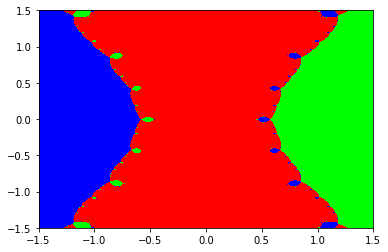

In [4]:
def func_problem_7(f, Df, res, b, iters,zero_values, alpha=1):
    X = dict()
    x_real = np.linspace(b[0], b[1], res)    # Real parts.
    x_imag = np.linspace(b[2],b[3], res) # Imaginary parts.
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X[0] = X_real + 1j*X_imag
    for i in range(1, iters):
        X[i] = X[i-1] - alpha*f(X[i-1])/Df(X[i-1])
    
    
    dist_tensor = np.zeros((X[i].shape[0], X[i].shape[0], zero_values.shape[0]))
    for j in range(zero_values.shape[0]):
        dist_tensor[:,:, j] = np.absolute(X[i]-zero_values[j])
    
    Y = np.zeros_like(X[i])
    
    Y = np.argmin(dist_tensor, axis=2)
    return x_real, x_imag, Y, X, dist_tensor
        

f = lambda x: x**3 - x
Df = lambda x: 3*x**2 -1
res = 1000
b = [-1.5, 1.5, -1.5, 1.5]

x_real, x_imag, Y, X, dist_tensor= func_problem_7(f, Df, res, b, 10, np.array([-1,0,1]))

plt.pcolormesh(x_real,x_imag, Y, cmap = 'brg')

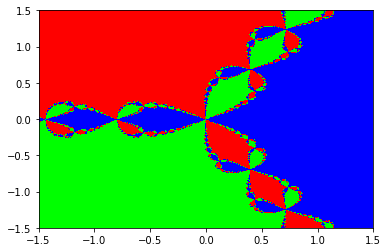

In [8]:
f = lambda x: x**3 - 1
Df = lambda x: 3*x**2
res = 1000
b = [-1.5, 1.5, -1.5, 1.5]

x_real, x_imag, Y, X, dist_tensor= func_problem_7(f, Df, res, b, 100, np.array([1 , -1/2 + 1j*3**(0.5)/2, -1/2 - 1j*3**(0.5)/2]))

plt.pcolormesh(x_real,x_imag, Y, cmap = 'brg')